# Question 4

In [174]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import random
from google.colab.patches import cv2_imshow
from scipy.signal import convolve2d

## part a

In [175]:
# Do not change this cell
image = cv2.imread('cat.png',cv2.IMREAD_GRAYSCALE)

In [177]:
def Add_Noise(img):
    row , col = img.shape
    number_of_pixels = random.randint(2000, 100000)
    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        img[y_coord][x_coord] = 255

    number_of_pixels = random.randint(2000 , 100000)
    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        img[y_coord][x_coord] = 0

    return img

(-0.5, 374.5, 499.5, -0.5)

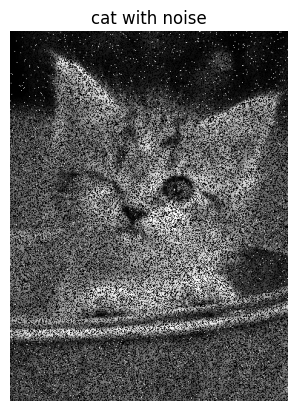

In [178]:
image = Add_Noise(image)
plt.imshow(image,cmap='gray')
plt.title("cat with noise")
plt.axis("off")

#part b

<h3> in this section we want to implement : </h3>

1.   Averaging Blurring
2.   Median Blurring
3.   Gaussian Blurring

<h3> you should define reflect101 padding function and use it befor blurring </h3>
<h3><b> note : you can't use libraries in this section </b></h3>
<h3><b> note : you can't use loop in Reflect101 function </b></h3>




In [180]:
def Reflect101(img,filter_size):
  '''
    Do not use loop (like while and for)
    Do not use libraries
    calculate averaging filter
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      image (ndarray): computed Reflect101
  '''

  #######################
  #    your code here   #
  #######################

  h, w = img.shape
  fh = filter_size
  half_fh = fh // 2
  half_fw = fh // 2

  #make padding for image
  image = np.pad(img, ((half_fh , half_fh), (half_fw , half_fw)), mode='reflect')

  return image

In [181]:
def Averaging_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed averaging blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))

  #######################
  #    your code here   #
  #######################
  fh = filter_size

  # create a filter that is 1 / filter size * filter size
  filter = np.ones((fh, fh)) / (fh * fh)
  # then convolve the filter with the image
  result = convolve2d(image, filter, mode='valid')

  return result

In [182]:
def Median_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed median blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))

  #######################
  #    your code here   #
  #######################

  h, w = img.shape

  for i in range(h):
      for j in range(w):
          # hold the part i wanna apply meadian on
          hold = image[i : i + filter_size, j : j + filter_size].flatten()
          median = np.median(hold)
          result[i, j] = median
  return result

In [183]:

def Gaussian_Blurring(img, filter_size, std):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): std of gaussian kernel
    output(s):
      result (ndarray): computed gaussian blurring
    '''
    kernel = np.zeros((filter_size,filter_size))
    #######################
    #    your code here   #
    #######################
    for i in range(filter_size):
        for j in range(filter_size):
            kernel[i, j] = (1 / (2 * np.pi * std**2)) * np.exp(-(i**2 + j**2) / (2 * std**2))
    kernel /= np.sum(kernel)
    output = img.copy()
    result = cv2.filter2D(src = output, ddepth = -1, kernel = kernel)
    return result

(-0.5, 374.5, 499.5, -0.5)

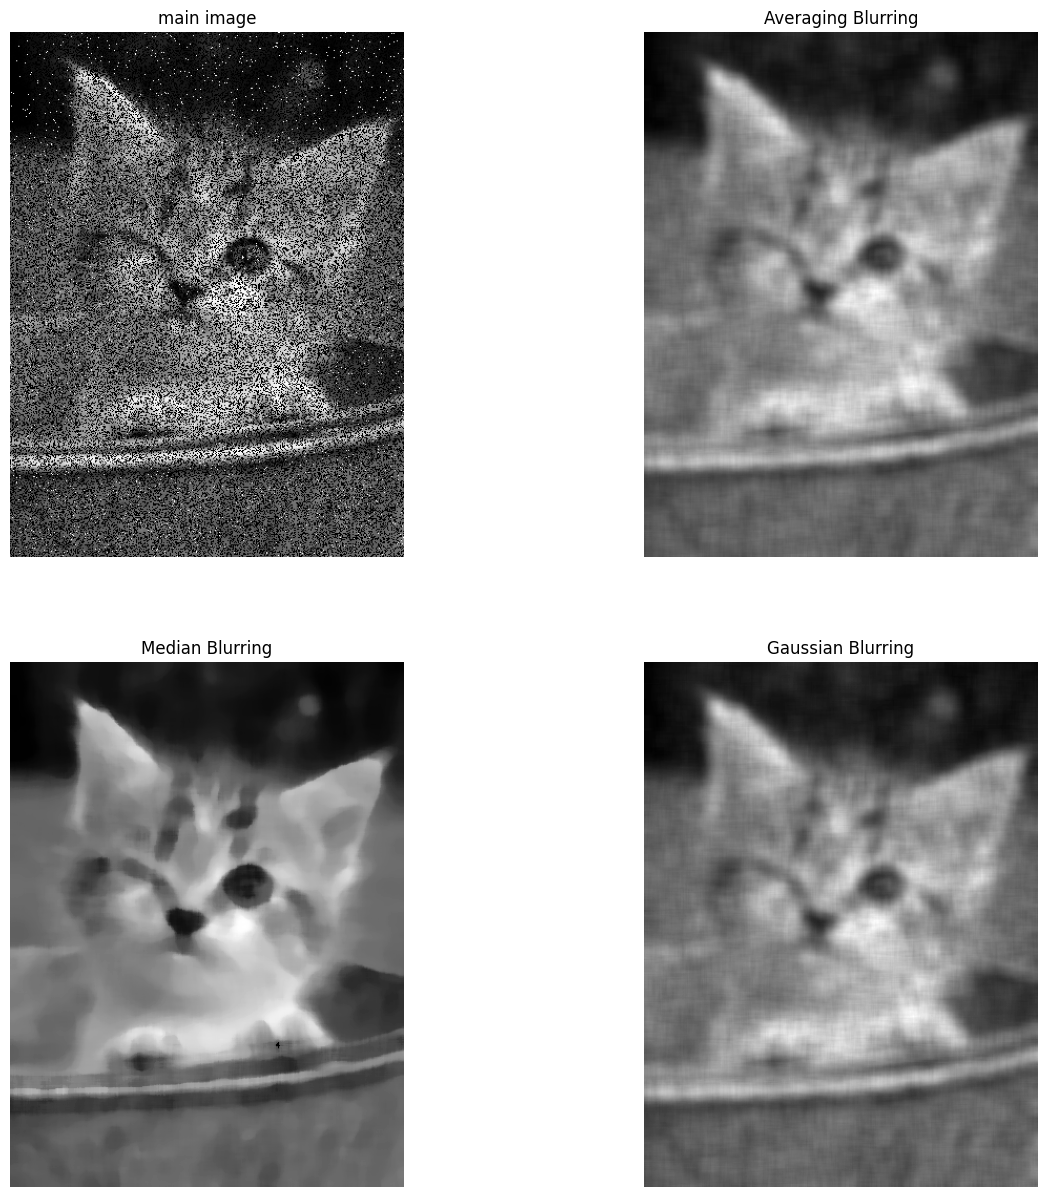

In [184]:
# Do not change this cell
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

AB = Averaging_Blurring(image,15)
plt.subplot(2,2,2)
plt.imshow(AB,cmap='gray')
plt.title("Averaging Blurring")
plt.axis("off")

MB = Median_Blurring(image,15)
plt.subplot(2,2,3)
plt.imshow(MB,cmap='gray')
plt.title("Median Blurring")
plt.axis("off")

GB = Gaussian_Blurring(image,15,40)
plt.subplot(2,2,4)
plt.imshow(GB,cmap='gray')
plt.title("Gaussian Blurring")
plt.axis("off")


## part c

<h3> in this section we want to implement all blurrings with opencv and compare their with part b </h3>
<h3><b> note : for comparison, the parameters should be the same as in part b </b></h3>

In [185]:
AveragingBlurring = cv2.blur(image , (15,15))
MedianBlurring = cv2.medianBlur(image, 15)
GaussianBlurring = cv2.GaussianBlur(image , (15,15) , 40)

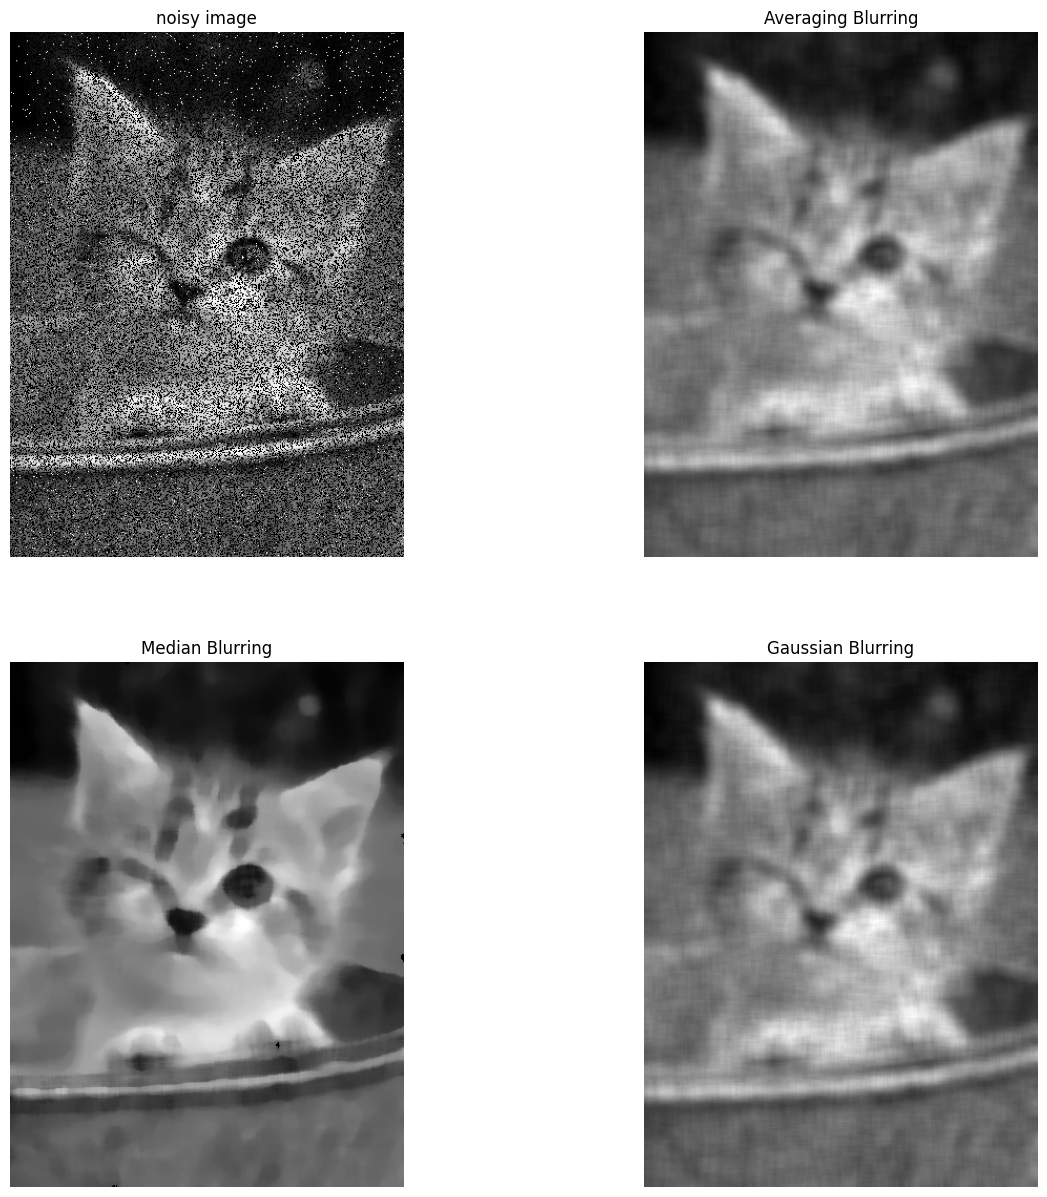

In [186]:
# Do not change this cell
Array = [image, AveragingBlurring, MedianBlurring, GaussianBlurring]
titles = ['noisy image', 'Averaging Blurring', 'Median Blurring', 'Gaussian Blurring']
plt.figure(figsize=(15,15))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(Array[i],cmap='gray')
  plt.title(titles[i])
  plt.axis("off")